In [2]:
#XGB
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import shap
import matplotlib as plt
import pickle
# 读取数据集
data = pd.read_csv('data.csv')
X  = data.iloc[:, 1:-1]
y = data.iloc[:, -1]
# 准备特征和标签
id = [row[0] for row in data]
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.to_csv('traindata.csv',index = False)
X_test.to_csv('testdata.csv',index = False)
params = {
    'objective': 'reg:squarederror',  # 回归任务
    'max_depth': 3,  # 树的最大深度
    'learning_rate': 0.18,  # 学习率
    'n_estimators': 100 # 迭代次数
}
# 定义模型函数
model = xgb.XGBRegressor(**params)

model.fit(X_train,y_train)
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(model, f)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.to_csv('predictions.csv', index=False)
train_mae = mean_absolute_error(y_train_pred, y_train)
train_mape = mean_absolute_percentage_error(y_train_pred, y_train)
train_r2=r2_score(y_train_pred, y_train)
tset_mae = mean_absolute_error(y_pred, y_test)
tset_mape = mean_absolute_percentage_error(y_pred, y_test)
test_r2=r2_score(y_pred, y_test)

print("Train MAE:", train_mae)
print("Train MAPE:", train_mape)
print("Train R²:", train_r2)
print("Test MAE:", tset_mae)
print("Test MAPE:", tset_mape)
print("Test R²:", test_r2)

explainer = shap.Explainer(model)

# 获取SHAP值
shap_values = explainer(X)

# 画出SHAP汇总图
shap.summary_plot(shap_values, X)#, plot_type='bar')


Train MAE: 10.507739451176473
Train MAPE: 0.06821593151935214
Train R²: 0.9674864282171307
Test MAE: 17.06063926265462
Test MAPE: 0.09709455810808049
Test R²: 0.9009844880252037


Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


Train Accuracy: 0.9790794979079498
Test Accuracy: 0.9166666666666666
Train Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       139
           1       0.97      0.98      0.98       100

    accuracy                           0.98       239
   macro avg       0.98      0.98      0.98       239
weighted avg       0.98      0.98      0.98       239

Test Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93        35
           1       0.88      0.92      0.90        25

    accuracy                           0.92        60
   macro avg       0.91      0.92      0.91        60
weighted avg       0.92      0.92      0.92        60



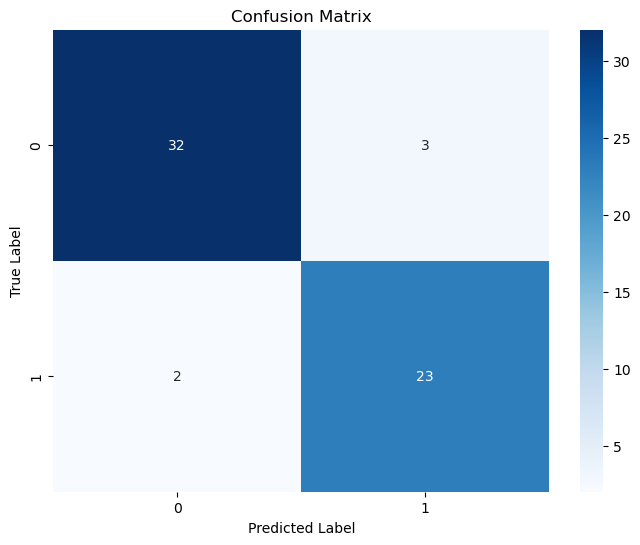

In [53]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据集
data = pd.read_csv('data.csv')
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

# 确保目标变量是二分类
# 这里假设y的值为0和1，如果不是，则需要进行相应的转换
y = (y > 200).astype(int)  # 将y转换为二分类（0 和 1）

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 设置XGBoost的分类参数
params = {
    'objective': 'binary:logistic',  # 二分类任务
    'max_depth': 3,  # 树的最大深度
    'learning_rate': 0.15,  # 学习率
    'n_estimators': 100,  # 迭代次数
    'eval_metric': 'logloss' 
}

# 定义XGBoost分类模型
model = xgb.XGBClassifier(**params)

# 训练模型
model.fit(X_train, y_train)

# 预测训练集和测试集
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)[:, 1]  # 只取正类的概率

# 评估模型性能
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

print("Train Classification Report:\n", train_report)
print("Test Classification Report:\n", test_report)

# 生成混淆矩阵
conf_matrix = confusion_matrix(y_test, y_test_pred)

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix.png')  # 保存为图片
plt.show()  # 显示图片


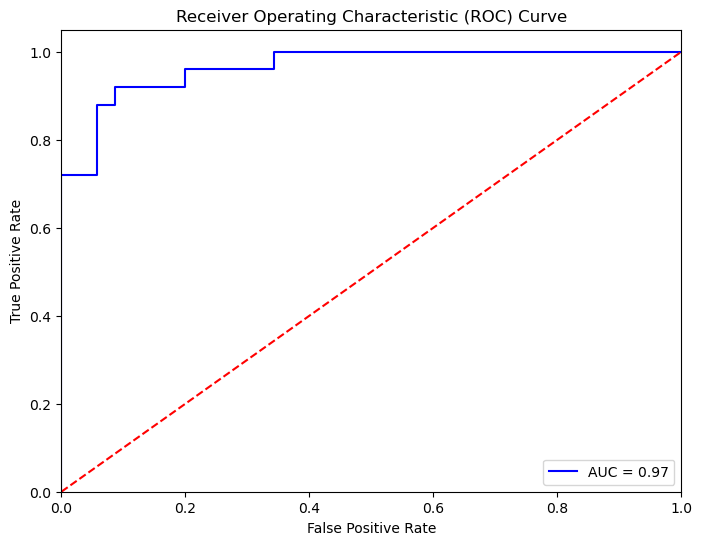

In [44]:
# 计算AUC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# 绘制AUC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='AUC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # 参考线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('roc_curve.png')  # 保存为图片
plt.show()  # 显示图片

Train Accuracy: 0.9246861924686193
Test Accuracy: 0.5833333333333334
Train Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        50
           1       0.96      0.87      0.91        77
           2       0.87      0.95      0.91        58
           3       0.93      0.93      0.93        40
           4       1.00      1.00      1.00        14

    accuracy                           0.92       239
   macro avg       0.94      0.94      0.94       239
weighted avg       0.93      0.92      0.92       239

Test Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.69      0.69      0.69        16
           2       0.67      0.60      0.63        20
           3       0.41      0.64      0.50        11
           4       0.40      0.33      0.36         6
           5       0.00      0.00      0.00         1

   

d:\Anaconda3\envs\sk_learn\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda3\envs\sk_learn\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda3\envs\sk_learn\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


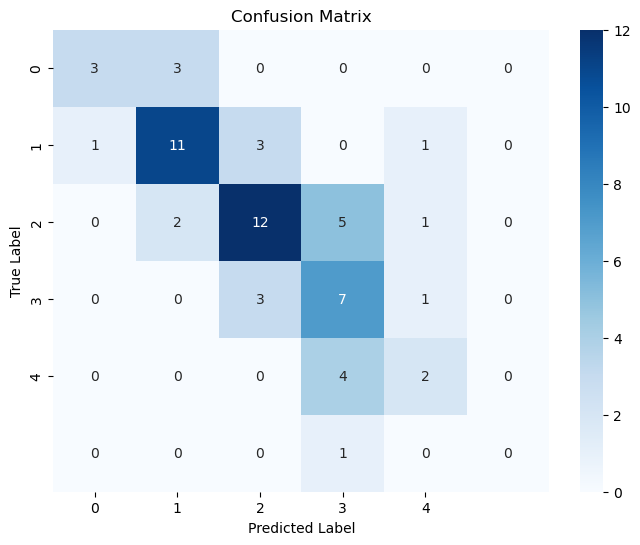

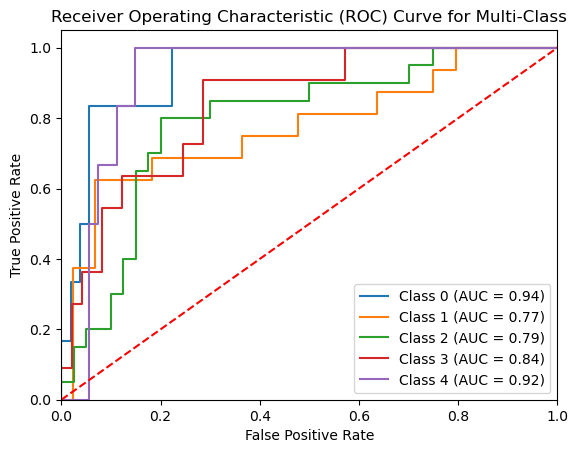

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据集
data = pd.read_csv('data.csv')
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

# 自定义区间划分函数
def create_bins(y, num_bins):
    bins = np.linspace(y.min(), y.max(), num_bins + 1)  # 创建指定数量的区间
    y_binned = np.digitize(y, bins) - 1  # 将y转换为类别（从0开始）
    return y_binned

# 用户可以指定区间数量
num_bins = 4  # 这里可以修改为所需的区间数
y = create_bins(y, num_bins)

# 确保目标变量是多分类
y = y.astype(int)  # 使标签成为分类数据

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

# 设置XGBoost的分类参数
params = {
    'objective': 'multi:softprob',  # 多分类任务
    'num_class': num_bins,  # 目标类别数 (根据num_bins调整)
    'max_depth': 3,  # 树的最大深度
    'learning_rate': 0.15,  # 学习率
    'n_estimators': 80,  # 迭代次数
    'eval_metric': 'mlogloss' 
}

# 定义XGBoost分类模型
model = xgb.XGBClassifier(**params)

# 训练模型
model.fit(X_train, y_train)

# 预测训练集和测试集
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)  # 获取每个类别的概率

# 评估模型性能
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("Train Classification Report:\n", train_report)
print("Test Classification Report:\n", test_report)

# 生成混淆矩阵
conf_matrix = confusion_matrix(y_test, y_test_pred)

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(num_bins), yticklabels=np.arange(num_bins))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix.png')  # 保存为图片
plt.show()  # 显示图片

# 计算和绘制 ROC 曲线（针对多分类）
for i in range(num_bins):
    # 计算每个类别与其他类别的ROC曲线
    y_test_binarized = (y_test == i).astype(int)
    fpr, tpr, _ = roc_curve(y_test_binarized, y_scores[:, i])
    roc_auc = auc(fpr, tpr)

    # 绘制每个类别的AUC曲线
    plt.plot(fpr, tpr, label='Class {} (AUC = {:.2f})'.format(i, roc_auc))

plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # 参考线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc='lower right')
plt.savefig('roc_curve.png')  # 保存为图片
plt.show()  # 显示图片


In [ ]:
#部分依赖图PDP分析相关性
from sklearn.inspection import PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(model, X, [{'MW', 'Ratio'}])

In [ ]:
#SVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import pandas as pd

# 读取数据集
data = pd.read_csv('data.csv')

# 准备特征和标签
id = [row[0] for row in data]
X = data.iloc[:, 1:-1]  # 选择除最后一列之外的所有列作为特征
y = data.iloc[:, -1]    # 最后一列作为目标标签

scaler = StandardScaler()
X = scaler.fit_transform(X)
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
params = {
    'C': 800,
    'kernel': 'rbf',
    'gamma': 0.77
}
# 定义模型函数
model = SVR(**params)
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.to_csv('svr_preds.csv', index=False)
train_mae = mean_absolute_error(y_train_pred, y_train)
train_mape = mean_absolute_percentage_error(y_train_pred, y_train)
train_r2=r2_score(y_train_pred, y_train)
tset_mae = mean_absolute_error(y_pred, y_test)
tset_mape = mean_absolute_percentage_error(y_pred, y_test)
test_r2=r2_score(y_pred, y_test)

print("Train MAE:", train_mae)
print("Train MAPE:", train_mape)
print("Train R²:", train_r2)
print("Test MAE:", tset_mae)
print("Test MAPE:", tset_mape)
print("Test R²:", test_r2)

In [ ]:
#KRR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge
import pandas as pd

# 读取数据集
data = pd.read_csv('data.csv')

# 准备特征和标签
id = [row[0] for row in data]
X = data.iloc[:, 1:-1]  # 选择除最后一列之外的所有列作为特征
y = data.iloc[:, -1]    # 最后一列作为目标标签

scaler = StandardScaler()
X = scaler.fit_transform(X)
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
params = {
    'alpha': 0.003,
    'kernel': 'rbf',
    'gamma': None
}
# 定义模型函数
model = KernelRidge(**params)
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.to_csv('krr_preds.csv', index=False)
train_mae = mean_absolute_error(y_train_pred, y_train)
train_mape = mean_absolute_percentage_error(y_train_pred, y_train)
train_r2=r2_score(y_train_pred, y_train)
tset_mae = mean_absolute_error(y_pred, y_test)
tset_mape = mean_absolute_percentage_error(y_pred, y_test)
test_r2=r2_score(y_pred, y_test)

print("Train MAE:", train_mae)
print("Train MAPE:", train_mape)
print("Train R²:", train_r2)
print("Test MAE:", tset_mae)
print("Test MAPE:", tset_mape)
print("Test R²:", test_r2)

In [ ]:
#RF
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# 读取数据集
data = pd.read_csv('data.csv')

# 准备特征和标签
id = [row[0] for row in data]
X = data.iloc[:, 1:-1]  # 选择除最后一列之外的所有列作为特征
y = data.iloc[:, -1]    # 最后一列作为目标标签

scaler = StandardScaler()
X = scaler.fit_transform(X)
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
params = {
    'n_jobs': 4, 
    'n_estimators': 100,  # 设置随机森林中决策树的数量
    'max_depth': 8,
    'random_state': 64
}
# 定义模型函数
model = RandomForestRegressor(**params)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.to_csv('rf_preds.csv', index=False)
train_mae = mean_absolute_error(y_train_pred, y_train)
train_mape = mean_absolute_percentage_error(y_train_pred, y_train)
train_r2=r2_score(y_train_pred, y_train)
tset_mae = mean_absolute_error(y_pred, y_test)
tset_mape = mean_absolute_percentage_error(y_pred, y_test)
test_r2=r2_score(y_pred, y_test)

print("Train MAE:", train_mae)
print("Train MAPE:", train_mape)
print("Train R²:", train_r2)
print("Test MAE:", tset_mae)
print("Test MAPE:", tset_mape)
print("Test R²:", test_r2)


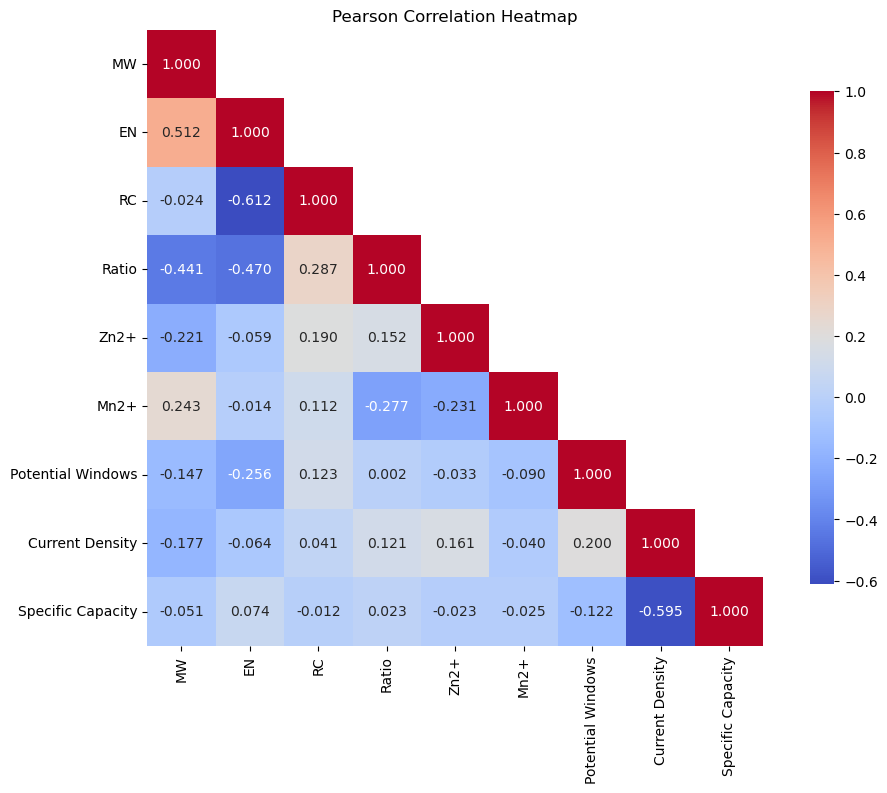

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 读取CSV文件
df = pd.read_csv('data.csv')

# 选择除第一列外的其他列数据
data = df.iloc[:, 1:]

# 计算Pearson相关系数
correlation_matrix = data.corr()

# 创建一个掩码，只显示上三角部分，保留对角线
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

cmap = sns.color_palette("coolwarm", as_cmap=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", mask=mask, cmap=cmap, square=True, cbar_kws={"shrink": .8})
plt.title('Pearson Correlation Heatmap')
plt.show()


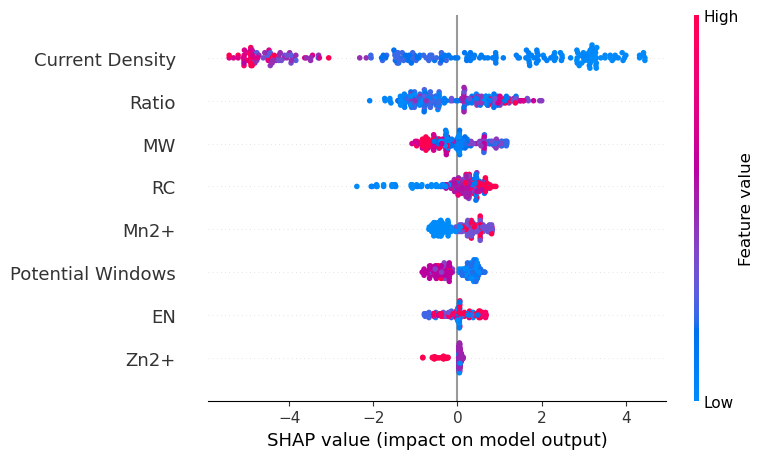

In [54]:
import shap
explainer = shap.Explainer(model)

# 获取SHAP值
shap_values = explainer(X_train, check_additivity=False)

# 画出SHAP汇总图
shap.summary_plot(shap_values, X_train)#, plot_type='bar')

Train Accuracy: 0.9832775919732442
Train Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       174
           1       0.98      0.98      0.98       125

    accuracy                           0.98       299
   macro avg       0.98      0.98      0.98       299
weighted avg       0.98      0.98      0.98       299



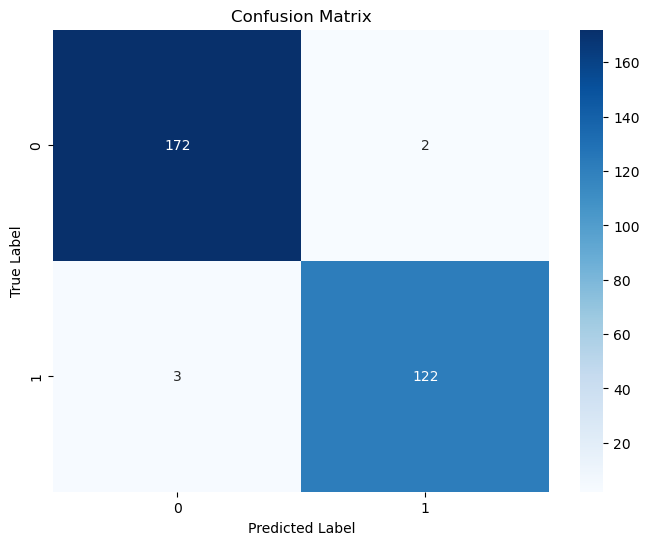

In [1]:
#pred
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据集
data = pd.read_csv('data.csv')
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

# 确保目标变量是二分类
# 这里假设y的值为0和1，如果不是，则需要进行相应的转换
y = (y > 200).astype(int)  # 将y转换为二分类（0 和 1）

# 划分训练集和测试集
X_train = X
y_train = y
data1 = pd.read_csv('pred_data.csv')
X_test = data1.iloc[:, 1:-1]

# 设置XGBoost的分类参数
params = {
    'objective': 'binary:logistic',  # 二分类任务
    'max_depth': 3,  # 树的最大深度
    'learning_rate': 0.15,  # 学习率
    'n_estimators': 100,  # 迭代次数
    'eval_metric': 'logloss' 
}

# 定义XGBoost分类模型
model = xgb.XGBClassifier(**params)

# 训练模型
model.fit(X_train, y_train)

# 预测训练集和测试集
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#y_scores = model.predict_proba(X_test)[:, 1]  # 只取正类的概率

# 评估模型性能
train_acc = accuracy_score(y_train, y_train_pred)

train_report = classification_report(y_train, y_train_pred)

print("Train Accuracy:", train_acc)

print("Train Classification Report:\n", train_report)

# 生成混淆矩阵
conf_matrix = confusion_matrix(y_train, y_train_pred)

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix.png')  # 保存为图片
plt.show()  # 显示图片
data1['Range'] = y_test_pred  # 添加预测结果列

# 保存更新后的DataFrame到CSV文件
data1.to_csv('pred_data.csv', index=False)  # 保存文件，不保存行索引

In [3]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import shap
import matplotlib as plt

# 读取数据集
data = pd.read_csv('data.csv')
X  = data.iloc[:, 1:-1]
y = data.iloc[:, -1]
# 准备特征和标签
id = [row[0] for row in data]
# 划分训练集和测试集
X_train = X
y_train = y
data1 = pd.read_csv('pred_data.csv')
X_test = data1.iloc[:, 1:-1]
params = {
    'objective': 'reg:squarederror',  # 回归任务
    'max_depth': 3,  # 树的最大深度
    'learning_rate': 0.18,  # 学习率
    'n_estimators': 100 # 迭代次数
}
# 定义模型函数
model = xgb.XGBRegressor(**params)

model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
train_mae = mean_absolute_error(y_train_pred, y_train)
train_mape = mean_absolute_percentage_error(y_train_pred, y_train)
train_r2=r2_score(y_train_pred, y_train)

print("Train MAE:", train_mae)
print("Train MAPE:", train_mape)
print("Train R²:", train_r2)
data1['Range'] = y_pred  # 添加预测结果列

# 保存更新后的DataFrame到CSV文件
data1.to_csv('pred_data.csv', index=False)  # 保存文件，不保存行索引

Train MAE: 10.881107074895242
Train MAPE: 0.06787249634601568
Train R²: 0.9651744437107372
